Michael Dasseville

<h1><center>TSIA 2013 Introduction to Deep Learning</center></h1>
<h2><center>CIFAR10 classification using a VGG-like CNN</center></h2>
<center>Email the complete notebook to attilio.fiandrotti@telecom-paristech.fr</center>

# Installing and importing Keras

In [1]:
# Importing the Keras main module: different backends will have different data ordering:
# theano backend: NCHW
# tensorflow backend: NHWC 
import keras

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9796148290673177519
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6671596257
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11627960861538374768
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:0a:00.0, compute capability: 6.1"
]


# Loading and preparing the CIFAR10 dataset
Load the CIFAR10 dataset, normalize the input images with respect to mean and standard deviation and convert labels to one-hot encoding.

In [3]:
#@title
# The CIFAR dataset is ready to be imported from Keras into RAM
from keras.datasets import cifar10
# START CODE HERE
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

img_rows, img_cols = 32,32

from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# END CODE HERE

# Defining the neural network architecture (i.e., the network model)
Define and compile a LeNet5-like convolutional neural network according to the topology and hyperparameters that yield the best results in the previous exercise over the MNIST dataset.

In [6]:
# Defining our SGD optimizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D

# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to teh computed error gradints
from keras import optimizers

input_shape = x_train.shape[1:]

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

nb_classes = 10

# START CODE HERE
model = Sequential()
model.add(Convolution2D(input_shape=input_shape, kernel_size=kernel_size,filters=num_kernel_first_conv_layer))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(filters=num_kernel_second_conv_layer, kernel_size=kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(units=120,input_dim=400))
model.add(Activation('relu'))
model.add(Dense(units=84,input_dim=120))
model.add(Activation('relu'))
model.add(Dense(units=10, input_dim=84))
model.add(Activation('softmax'))
# END CODE HERE

# Defining our SGD optimizer

# START CODE HERE
myop = optimizers.SGD(lr=0.001)
model.compile(optimizer=myop,loss='categorical_crossentropy', metrics=['accuracy'])
# END CODE HERE

# Let us have a look at the model topology
model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_12 (Activation)   (None, 10, 10, 16)        0         
___________________________

# Training the network
Train the network using the configuration that yield the best results in the pervious exercise.

In [15]:
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 100
# We train the model for 10 epochs
epochs = 10

# START CODE HERE
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test)
                    ,epochs=epochs, batch_size=batch_size)
# END CODE HERE

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 74us/step - loss: 3.4892 - acc: 0.1090 - val_loss: 2.3093 - val_acc: 0.1062
Epoch 2/10
50000/50000 [==============================] - 3s 67us/step - loss: 2.3046 - acc: 0.1056 - val_loss: 2.3057 - val_acc: 0.1045
Epoch 3/10
50000/50000 [==============================] - 3s 66us/step - loss: 2.3031 - acc: 0.1062 - val_loss: 2.3047 - val_acc: 0.1030
Epoch 4/10
50000/50000 [==============================] - 3s 66us/step - loss: 2.3026 - acc: 0.1052 - val_loss: 2.3042 - val_acc: 0.1024
Epoch 5/10
50000/50000 [==============================] - 3s 66us/step - loss: 2.3023 - acc: 0.1062 - val_loss: 2.3039 - val_acc: 0.1018
Epoch 6/10
50000/50000 [==============================] - 3s 66us/step - loss: 2.3020 - acc: 0.1055 - val_loss: 2.3037 - val_acc: 0.1033
Epoch 7/10
50000/50000 [==============================] - 3s 66us/step - loss: 2.3018 - acc: 0.1069 - val_loss: 2.3035 - val_acc

# Experiments

* Note down the performance of the trained network (loss and accuracy curves) as a reference.





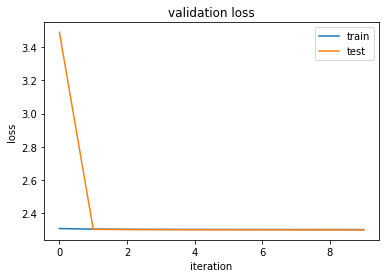

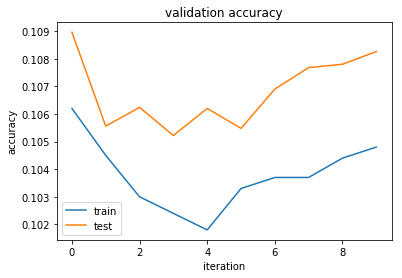

In [16]:
from matplotlib import pyplot as plt


# summarize history for loss
# START CODE HERE
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()

# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()


# VGG-net like architecture
Redefine your network architecture taking inspiration from the VGG topology.
If the network overfits to the training data, expeirment with dropout.

In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


In [8]:
from keras.layers import Dropout
k_size = (3,3)
p_size = (2,2)
strides = (2,2)
input_shape = x_train.shape[1:]

model = Sequential()
# Block 1
model.add(Convolution2D(64,k_size,input_shape=input_shape, activation='relu', padding='same'))
model.add(Convolution2D(64,k_size,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=p_size,strides=strides))
# Block 2
model.add(Convolution2D(128,k_size,activation='relu', padding='same'))
model.add(Convolution2D(128,k_size,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=p_size,strides=strides))
# Block 3
model.add(Convolution2D(256,k_size,activation='relu', padding='same'))
model.add(Convolution2D(256,k_size,activation='relu', padding='same'))
model.add(Convolution2D(256,k_size,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=p_size,strides=strides))
# Block 4
model.add(Convolution2D(512,k_size,activation='relu', padding='same'))
model.add(Convolution2D(512,k_size,activation='relu', padding='same'))
model.add(Convolution2D(512,k_size,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=p_size,strides=strides))
# Block 5
model.add(Convolution2D(512,k_size,activation='relu', padding='same'))
model.add(Convolution2D(512,k_size,activation='relu', padding='same'))
model.add(Convolution2D(512,k_size,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=p_size,strides=strides))
model.add(Flatten())
# Block 6
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

myop = optimizers.SGD(lr=0.001)
model.compile(optimizer=myop,loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
___________________________

In [9]:
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 100
# We train the model for 10 epochs
epochs = 10

# START CODE HERE
history1 = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test)
                    ,epochs=epochs, batch_size=batch_size)
# END CODE HERE

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 30s 598us/step - loss: 2.2494 - acc: 0.1542 - val_loss: 2.1002 - val_acc: 0.2078
Epoch 2/10
50000/50000 [==============================] - 28s 563us/step - loss: 2.0774 - acc: 0.2214 - val_loss: 1.9459 - val_acc: 0.2921
Epoch 3/10
50000/50000 [==============================] - 28s 559us/step - loss: 1.9669 - acc: 0.2760 - val_loss: 1.8097 - val_acc: 0.3484
Epoch 4/10
50000/50000 [==============================] - 28s 556us/step - loss: 1.8646 - acc: 0.3230 - val_loss: 1.7136 - val_acc: 0.3741
Epoch 5/10
50000/50000 [==============================] - 28s 558us/step - loss: 1.7672 - acc: 0.3590 - val_loss: 1.7970 - val_acc: 0.3481
Epoch 6/10
50000/50000 [==============================] - 28s 556us/step - loss: 1.6842 - acc: 0.3871 - val_loss: 1.5681 - val_acc: 0.4377
Epoch 7/10
50000/50000 [==============================] - 28s 556us/step - loss: 1.6198 - acc: 0.4107 - val_loss: 1.

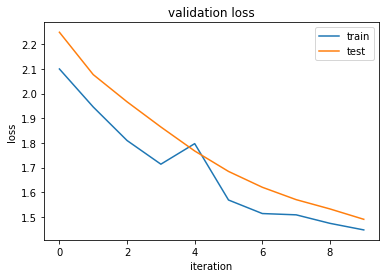

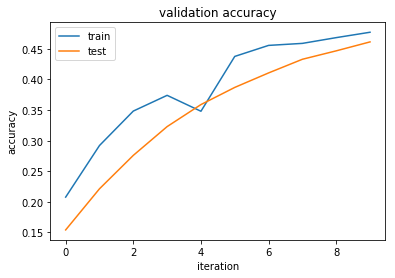

In [10]:
# summarize history for loss
# START CODE HERE
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()

# summarize history for accuracy
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['acc'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()


# Data augmentation
Instantiate an ImageDataGenerator using, for example, 10% random scaling and horizontal flipping as random transformations.
Find a set of random transformations that improve the network performance and note down the new reference performance.

In [11]:
# Creating a batch preprocessor for augmenting the trainig data
from keras.preprocessing.image import ImageDataGenerator
batch_size = 100

datagen = ImageDataGenerator(rescale=0.1, horizontal_flip=True)
datagen.fit(x_train)
h1 = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                        epochs=epochs, validation_data=(x_test,y_test),
                        steps_per_epoch = len(x_train)/batch_size)



Epoch 1/10
500/500 [==============================] - 27s 54ms/step - loss: 1.6759 - acc: 0.4284 - val_loss: 5.1225 - val_acc: 0.4402
Epoch 2/10
500/500 [==============================] - 27s 54ms/step - loss: 1.5450 - acc: 0.4431 - val_loss: 5.1805 - val_acc: 0.4636
Epoch 3/10
500/500 [==============================] - 27s 54ms/step - loss: 1.5011 - acc: 0.4574 - val_loss: 4.9570 - val_acc: 0.4798
Epoch 4/10
500/500 [==============================] - 27s 54ms/step - loss: 1.4736 - acc: 0.4703 - val_loss: 4.8679 - val_acc: 0.4972
Epoch 5/10
500/500 [==============================] - 27s 54ms/step - loss: 1.4508 - acc: 0.4776 - val_loss: 4.6332 - val_acc: 0.5103
Epoch 6/10
500/500 [==============================] - 27s 54ms/step - loss: 1.4202 - acc: 0.4904 - val_loss: 5.3736 - val_acc: 0.4896
Epoch 7/10
500/500 [==============================] - 27s 54ms/step - loss: 1.4007 - acc: 0.4978 - val_loss: 5.4718 - val_acc: 0.4801
Epoch 8/10
500/500 [==============================] - 27s 53ms

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, LSTM, Bidirectional
from keras.layers import Conv1D, MaxPooling2D


model = Sequential()
# CNN
model.add(Conv1D(filters=5,kernel_size=40, activation='relu', padding='same'))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))
#model.add(Convolution1D(filters=500,kernel_size=40,activation='relu', padding='same'))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=20))
#model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))

myop = optimizers.Adam(lr=0.001)
model.compile(optimizer=myop,loss='categorical_crossentropy', metrics=['accuracy'])

#model.summary()

In [17]:
model